In [15]:
from sklearn import datasets
import pandas as pd

In [16]:
dataset = datasets.fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [17]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
dataset['data'], dataset['target'], train_size=0.5, random_state=0)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

[[0.0513855  0.80392157 0.02077844 ... 0.00127374 0.64110756 0.28585657]
 [0.13401884 0.45098039 0.01906863 ... 0.00735591 0.14909478 0.61653386]
 [0.13558434 0.31372549 0.06729367 ... 0.0023829  0.1256656  0.79083665]
 ...
 [0.18605261 0.58823529 0.02090732 ... 0.00173858 0.42811502 0.2440239 ]
 [0.35389857 0.64705882 0.02773918 ... 0.00250076 0.11288605 0.63944223]
 [0.06126122 0.2745098  0.02309738 ... 0.00448481 0.02555911 0.87549801]]


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
clf=LinearRegression()
clf.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_absolute_error
y_test_hat=clf.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_test_hat))

MAE: 0.5330409077878336


In [80]:
import numpy as np
bins=np.linspace(0,1,5)
train_bin=np.digitize(X_train_scaled,bins=bins)
test_bin=np.digitize(X_test_scaled,bins=bins)
df=pd.DataFrame(train_bin)
display(df)
df=pd.DataFrame(test_bin)
display(df)


0  1  2  3  4  5  6  7
0      1  4  1  1  1  1  3  2
1      1  2  1  1  1  1  1  3
2      1  2  1  1  1  1  1  4
3      1  3  1  1  1  1  1  3
4      1  4  1  1  1  1  1  3
...   .. .. .. .. .. .. .. ..
10315  2  2  1  1  1  1  3  2
10316  1  3  1  1  1  1  3  2
10317  1  3  1  1  1  1  2  1
10318  2  3  1  1  1  1  1  3
10319  1  2  1  1  1  1  1  4

[10320 rows x 8 columns]

0  1  2  3  4  5  6  7
0      2  2  1  1  1  1  1  3
1      2  3  1  1  1  1  1  3
2      2  3  1  1  1  1  3  1
3      1  3  1  1  1  1  1  4
4      2  2  1  1  1  1  3  1
...   .. .. .. .. .. .. .. ..
10315  1  2  1  1  1  1  2  2
10316  1  1  1  1  4  1  2  2
10317  1  3  1  1  1  1  1  3
10318  3  4  1  1  1  1  3  1
10319  1  2  1  1  1  1  4  1

[10320 rows x 8 columns]

In [87]:
from sklearn.preprocessing import OneHotEncoder
train_bine=pd.DataFrame(train_bin)
one_hot=train_bine.columns.tolist()
train_bined=pd.get_dummies(train_bine, columns=one_hot)
display(train_bined.columns)


Index(['0_1', '0_2', '0_3', '0_4', '0_5', '1_1', '1_2', '1_3', '1_4', '2_1',
       '2_2', '2_5', '3_1', '3_2', '3_5', '4_1', '4_2', '4_5', '5_1', '5_2',
       '5_4', '6_1', '6_2', '6_3', '6_4', '6_5', '7_1', '7_2', '7_3', '7_4',
       '7_5'],
      dtype='object')

In [84]:
test_bine=pd.DataFrame(test_bin)
train_bine=pd.DataFrame(test_bin)
one_hots=test_bine.columns.tolist()
test_bined=pd.get_dummies(test_bine, columns=one_hots)
display(test_bined.columns)

Index(['0_1', '0_2', '0_3', '0_4', '0_5', '1_1', '1_2', '1_3', '1_4', '2_0',
       '2_1', '2_2', '2_5', '3_1', '3_2', '3_4', '4_1', '4_2', '4_4', '5_0',
       '5_1', '5_4', '5_5', '6_0', '6_1', '6_2', '6_3', '6_4', '6_5', '7_1',
       '7_2', '7_3', '7_4'],
      dtype='object')

In [88]:
train_bined['2_0']=0
train_bined['3_4']=0
train_bined['4_4']=0
train_bined['5_0']=0
train_bined['5_5']=0
train_bined['6_0']=0
display(train_bined)

0_1  0_2  0_3  0_4  0_5  1_1  1_2  1_3  1_4  2_1  ...  7_2  7_3  7_4  \
0        1    0    0    0    0    0    0    0    1    1  ...    1    0    0   
1        1    0    0    0    0    0    1    0    0    1  ...    0    1    0   
2        1    0    0    0    0    0    1    0    0    1  ...    0    0    1   
3        1    0    0    0    0    0    0    1    0    1  ...    0    1    0   
4        1    0    0    0    0    0    0    0    1    1  ...    0    1    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
10315    0    1    0    0    0    0    1    0    0    1  ...    1    0    0   
10316    1    0    0    0    0    0    0    1    0    1  ...    1    0    0   
10317    1    0    0    0    0    0    0    1    0    1  ...    0    0    0   
10318    0    1    0    0    0    0    0    1    0    1  ...    0    1    0   
10319    1    0    0    0    0    0    1    0    0    1  ...    0    0    1   

       7_5  2_0  3_4  4_4  5_0  5_5  6_0  
0        0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
10315    0    0    0    0    0    0    0  
10316    0    0    0    0    0    0    0  
10317    0    0    0    0    0    0    0  
10318    0    0    0    0    0    0    0  
10319    0    0    0    0    0    0    0  

[10320 rows x 37 columns]

In [90]:
test_bined['3_5']=0
test_bined['4_5']=0
test_bined['5_2']=0
test_bined['7_5']=0
display(test_bined)

0_1  0_2  0_3  0_4  0_5  1_1  1_2  1_3  1_4  2_0  ...  6_4  6_5  7_1  \
0        0    1    0    0    0    0    1    0    0    0  ...    0    0    0   
1        0    1    0    0    0    0    0    1    0    0  ...    0    0    0   
2        0    1    0    0    0    0    0    1    0    0  ...    0    0    1   
3        1    0    0    0    0    0    0    1    0    0  ...    0    0    0   
4        0    1    0    0    0    0    1    0    0    0  ...    0    0    1   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
10315    1    0    0    0    0    0    1    0    0    0  ...    0    0    0   
10316    1    0    0    0    0    1    0    0    0    0  ...    0    0    0   
10317    1    0    0    0    0    0    0    1    0    0  ...    0    0    0   
10318    0    0    1    0    0    0    0    0    1    0  ...    0    0    1   
10319    1    0    0    0    0    0    1    0    0    0  ...    1    0    1   

       7_2  7_3  7_4  3_5  4_5  5_2  7_5  
0        0    1    0    0    0    0    0  
1        0    1    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
10315    1    0    0    0    0    0    0  
10316    1    0    0    0    0    0    0  
10317    0    1    0    0    0    0    0  
10318    0    0    0    0    0    0    0  
10319    0    0    0    0    0    0    0  

[10320 rows x 37 columns]

In [105]:
clf.fit(train_bined, y_train)
y_test_hat=clf.predict(test_bined)
print("MAE:", mean_absolute_error(y_test, y_test_hat))


MAE: 2526616832406.011


In [137]:
from sklearn.preprocessing import PolynomialFeatures
ply=PolynomialFeatures(degree=2)
ply.fit(X_train_scaled)
train_poly=ply.transform(X_train_scaled)
test_poly=ply.transform(X_test_scaled)

In [138]:
clf.fit(train_poly, y_train)
y_test_hat=clf.predict(test_poly)
print("MAE:", mean_absolute_error(y_test, y_test_hat))

MAE: 0.48536363901905766


<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

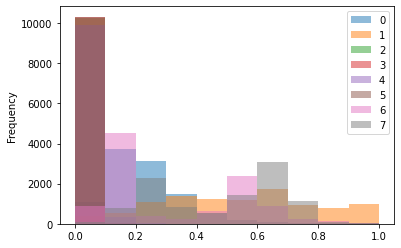

In [112]:
import matplotlib.pyplot as plt
df=pd.DataFrame(X_train_scaled)
plt.figure();
df.plot.hist(alpha=0.5)

In [114]:
X_train_log=np.log(X_train_scaled+1)
X_test_log=np.log(X_test_scaled+1)
clf.fit(X_train_log, y_train)
y_test_hat=clf.predict(X_test_log)
print("MAE:", mean_absolute_error(y_test, y_test_hat))

MAE: 0.5316358825181595


In [144]:
from sklearn.feature_selection import SelectKBest, f_classif
select=SelectKBest(f_classif, k=5)
select.fit(X_train_scaled, y_train)
X_train_selected= select.transform(X_train_scaled)
X_test_selected= select.transform(X_test_scaled)
select.get_support()
clf.fit(X_train_selected, y_train)
y_test_hat=clf.predict(X_test_selected)
print("MAE:", mean_absolute_error(y_test, y_test_hat))


MAE: 0.544770768570537


In [145]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator =SVR()
select=RFE(estimator, n_features_to_select=20, step=1)
select.fit(X_train_scaled, y_train)

X_train_selected=select.transform(X_train_scaled)
X_test_selected=select.transform(X_test_scaled)
select.get_support()
clf.fit(X_train_selected, y_train)
y_test_hat=clf.predict(X_test_selected)
print("MAE:", mean_absolute_error(y_test, y_test_hat))

MAE: 0.5330409077878371
